In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/amazon_sales_dataset_2019_2024_corrected.xlsx')

# Display the first few rows and the info
display(df.head())
display(df.info())

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,2019-01-01,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,2019-01-01,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,2019-01-02,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,2019-01-04,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Serious,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,2019-01-04,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          5000 non-null   object        
 1   Order Date        5000 non-null   datetime64[ns]
 2   Customer ID       5000 non-null   object        
 3   Customer Name     5000 non-null   object        
 4   Region            5000 non-null   object        
 5   Product Category  5000 non-null   object        
 6   Product Name      4999 non-null   object        
 7   Quantity Sold     5000 non-null   int64         
 8   Unit Price        5000 non-null   float64       
 9   Discount (%)      5000 non-null   float64       
 10  Salesperson       5000 non-null   object        
 11  Payment Method    5000 non-null   object        
 12  Order Status      5000 non-null   object        
 13  Total Sales       5000 non-null   float64       
 14  Profit Margin     5000 n

None

In [3]:
# Check for missing values
print("Missing values before cleaning:")
display(df.isnull().sum())

# Handle missing 'Product Name' - replace with 'Unknown'
df['Product Name'] = df['Product Name'].fillna('Unknown')


print("\nMissing values after cleaning:")
display(df.isnull().sum())

Missing values before cleaning:


,0
Order ID,0
Order Date,0
Customer ID,0
Customer Name,0
Region,0
Product Category,0
Product Name,0
Quantity Sold,0
Unit Price,0
Discount (%),0



Missing values after cleaning:


,0
Order ID,0
Order Date,0
Customer ID,0
Customer Name,0
Region,0
Product Category,0
Product Name,0
Quantity Sold,0
Unit Price,0
Discount (%),0


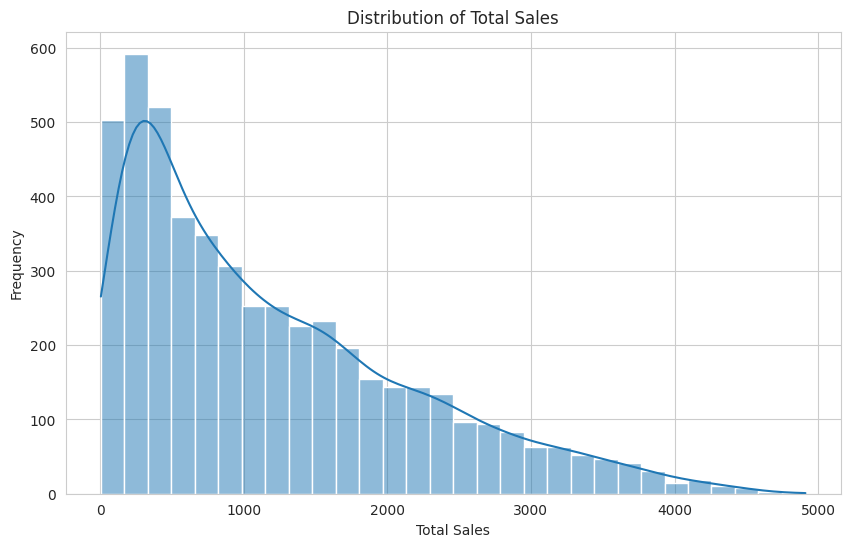

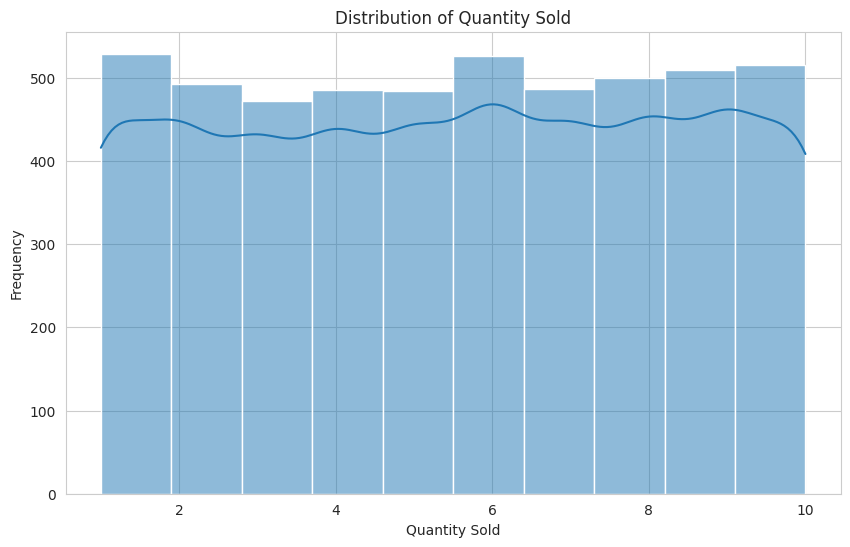

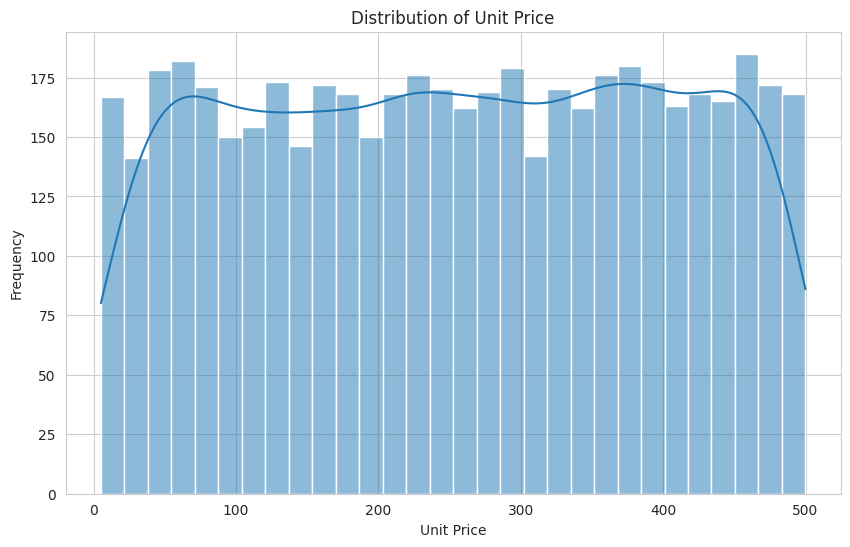

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Distribution of Total Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Sales'], kde=True, bins=30)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

# Distribution of Quantity Sold
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity Sold'], kde=True, bins=10)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

# Distribution of Unit Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Unit Price'], kde=True, bins=30)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

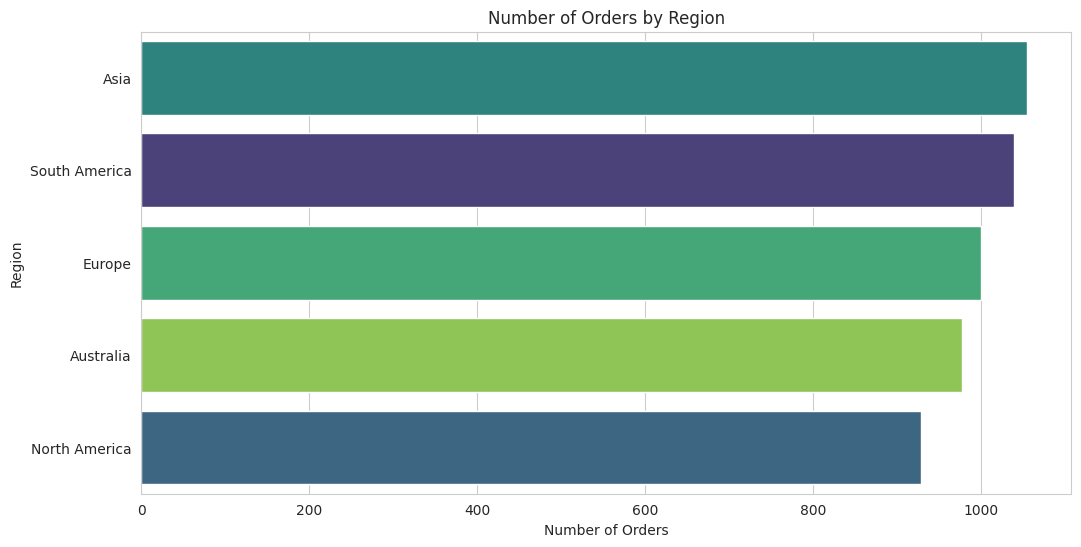

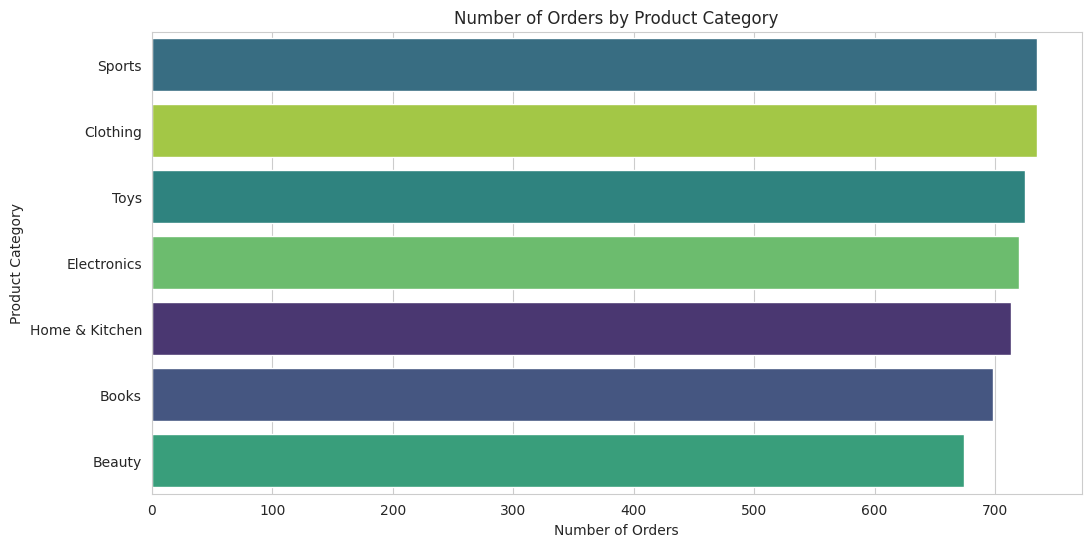

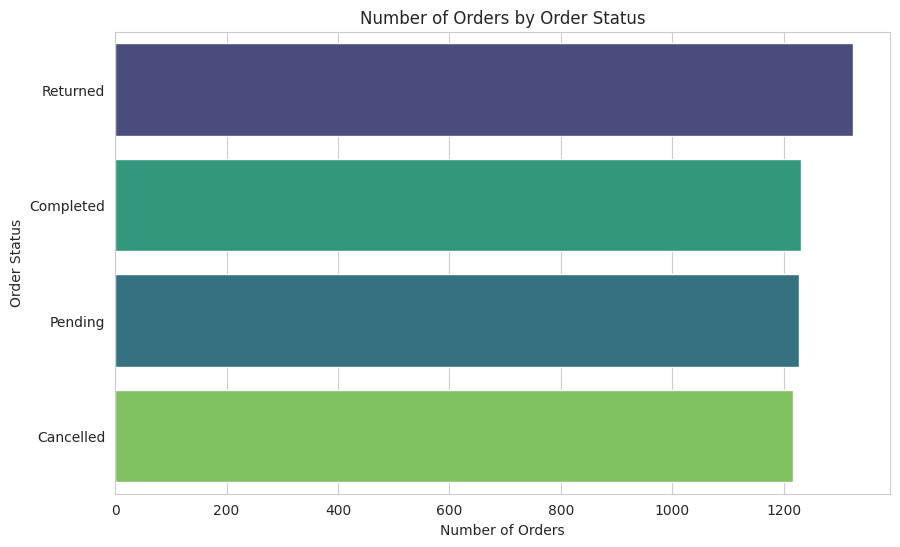

In [6]:
# Count of orders by Region
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Region', order = df['Region'].value_counts().index, palette='viridis', hue='Region', legend=False)
plt.title('Number of Orders by Region')
plt.xlabel('Number of Orders')
plt.ylabel('Region')
plt.show()

# Count of orders by Product Category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Product Category', order = df['Product Category'].value_counts().index, palette='viridis', hue='Product Category', legend=False)
plt.title('Number of Orders by Product Category')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

# Count of orders by Order Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Order Status', order = df['Order Status'].value_counts().index, palette='viridis', hue='Order Status', legend=False)
plt.title('Number of Orders by Order Status')
plt.xlabel('Number of Orders')
plt.ylabel('Order Status')
plt.show()

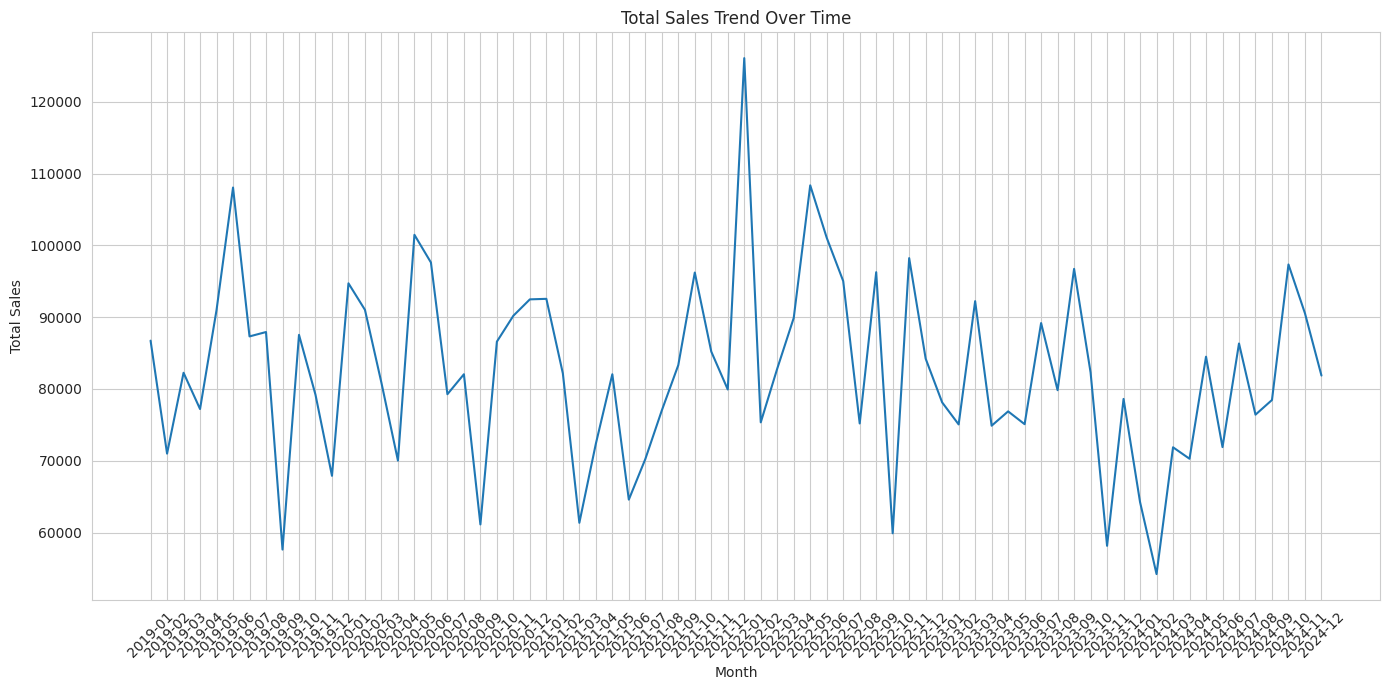

In [7]:
# Sales trend over time
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Total Sales'].sum().reset_index()
monthly_sales['Order Month'] = monthly_sales['Order Month'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Order Month', y='Total Sales')
plt.title('Total Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

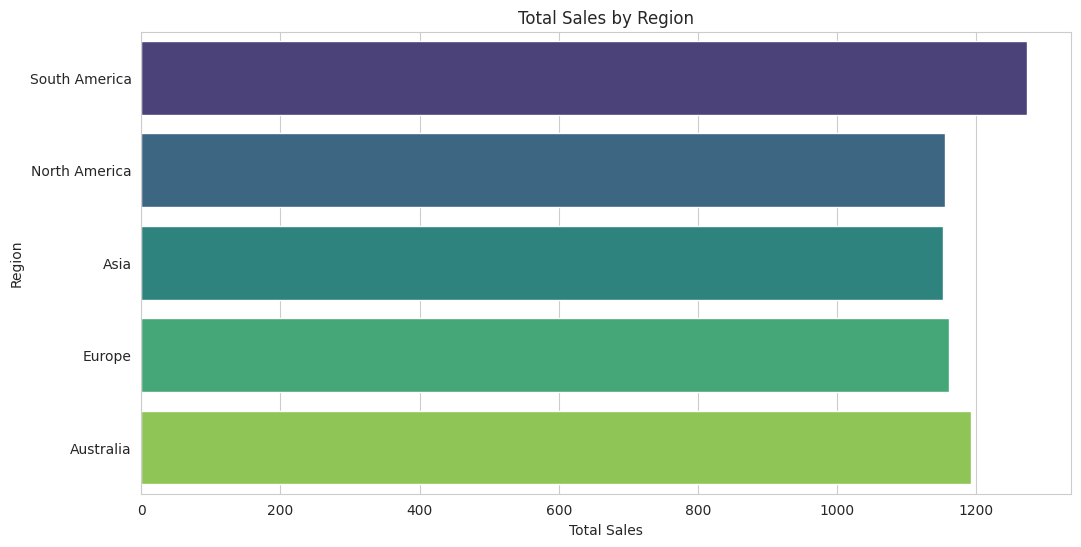

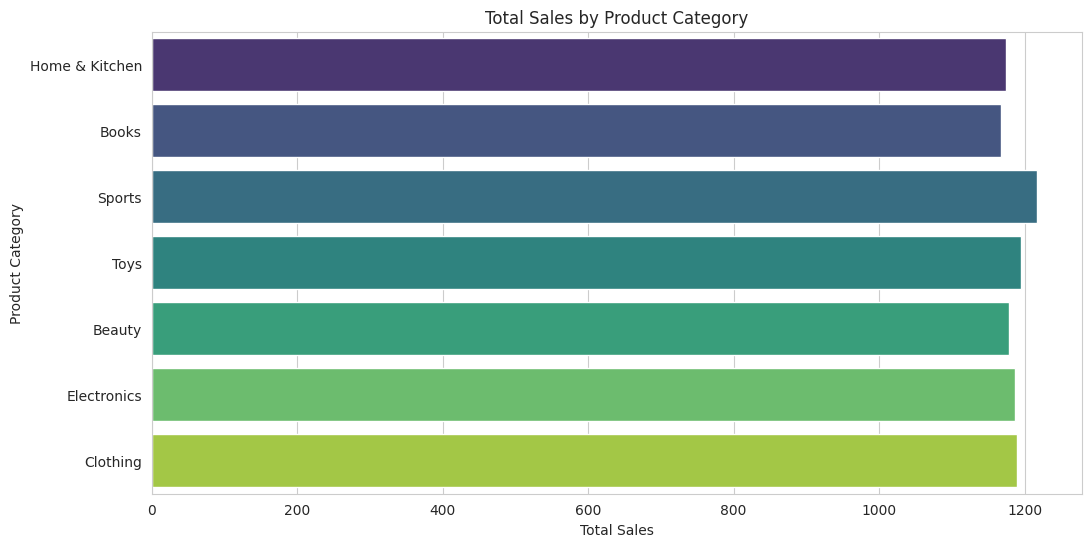

In [9]:
# Total Sales by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Total Sales', y='Region', errorbar=None, palette='viridis', hue='Region', legend=False)
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()

# Total Sales by Product Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Total Sales', y='Product Category', errorbar=None, palette='viridis', hue='Product Category', legend=False)
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

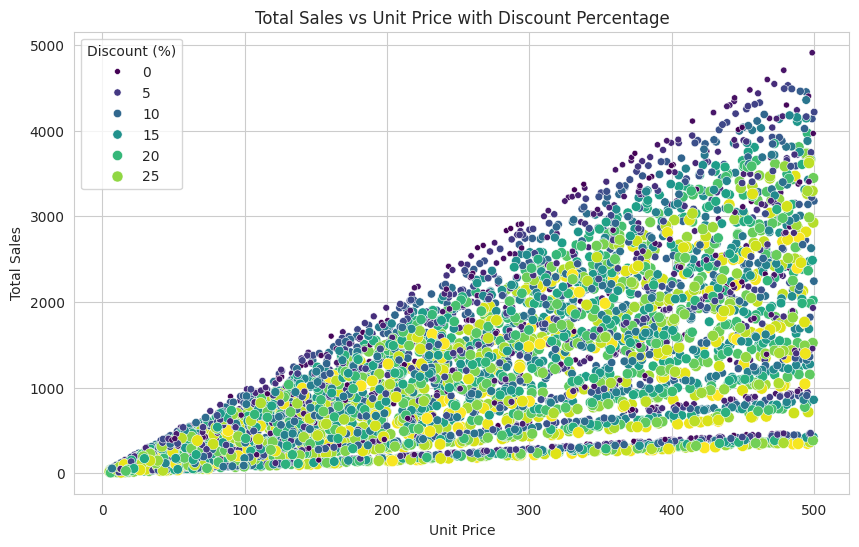

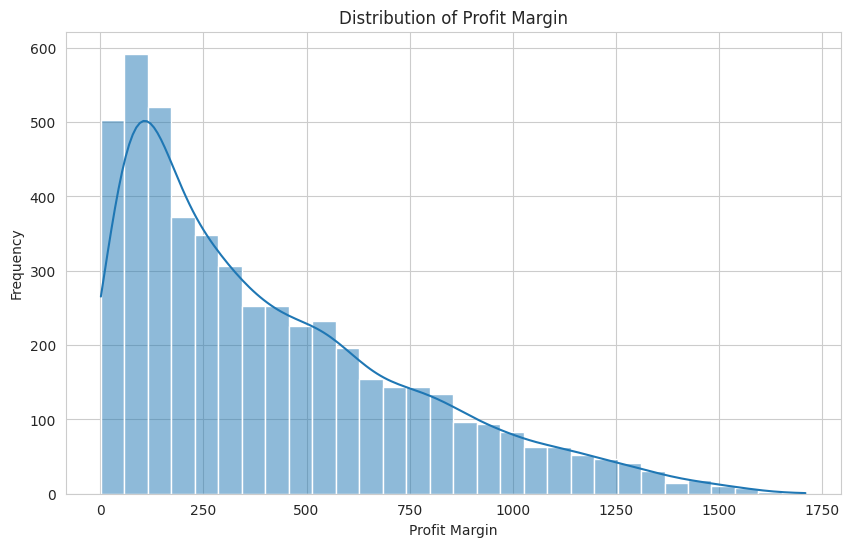

In [10]:
# Relationship between Discount, Unit Price and Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unit Price', y='Total Sales', hue='Discount (%)', size='Discount (%)', palette='viridis')
plt.title('Total Sales vs Unit Price with Discount Percentage')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.show()

# Distribution of Profit Margin
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit Margin'], kde=True, bins=30)
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

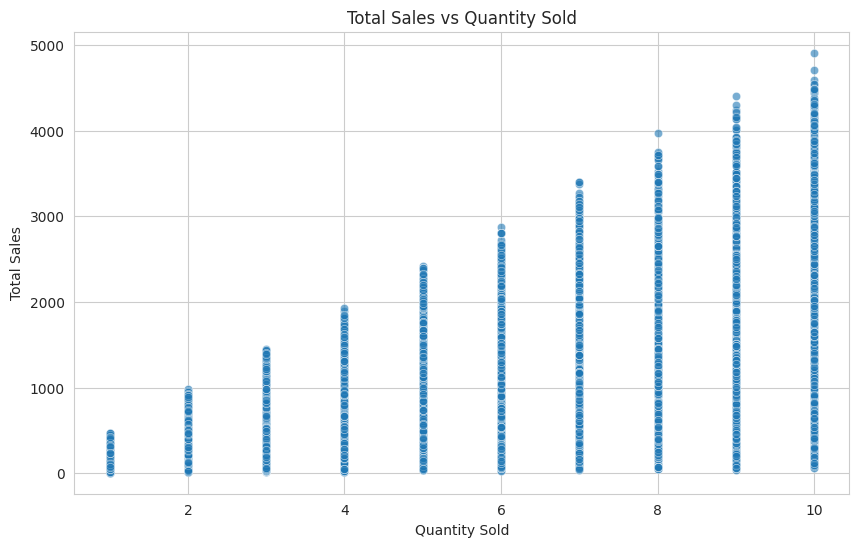

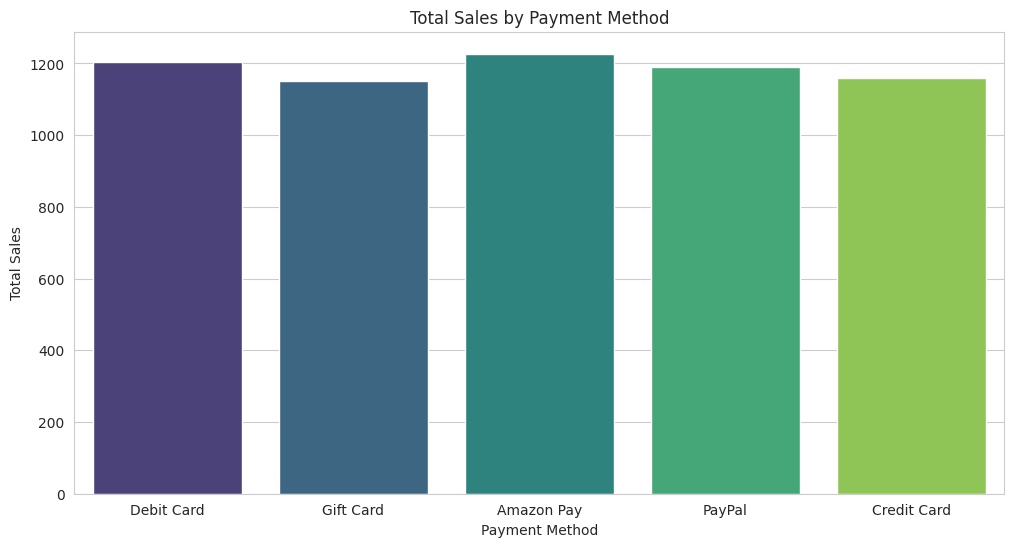

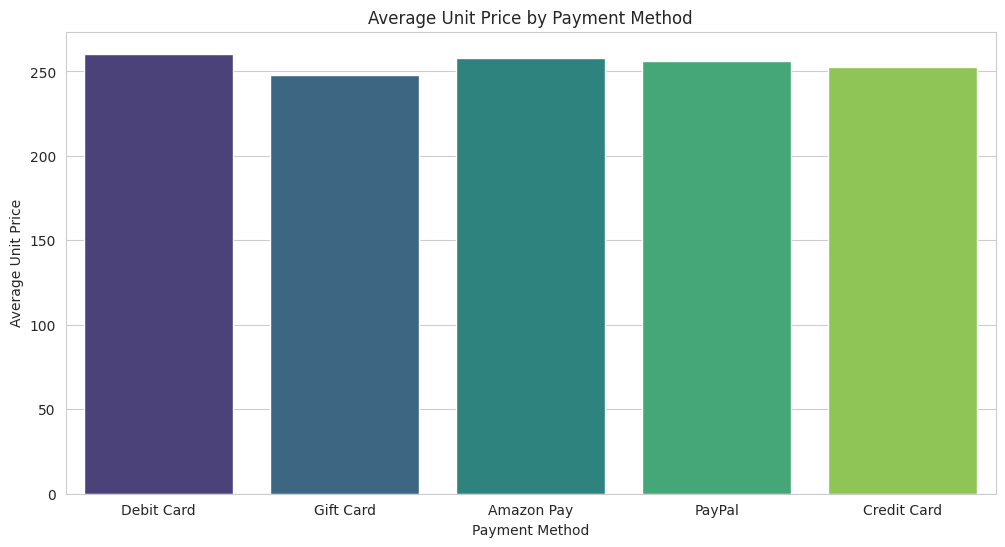

In [11]:
# Relationship between Quantity Sold and Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity Sold', y='Total Sales', alpha=0.6)
plt.title('Total Sales vs Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales')
plt.show()

# Total Sales and Unit Price by Payment Method
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Payment Method', y='Total Sales', errorbar=None, palette='viridis', hue='Payment Method', legend=False)
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Payment Method', y='Unit Price', errorbar=None, palette='viridis', hue='Payment Method', legend=False)
plt.title('Average Unit Price by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Unit Price')
plt.show()

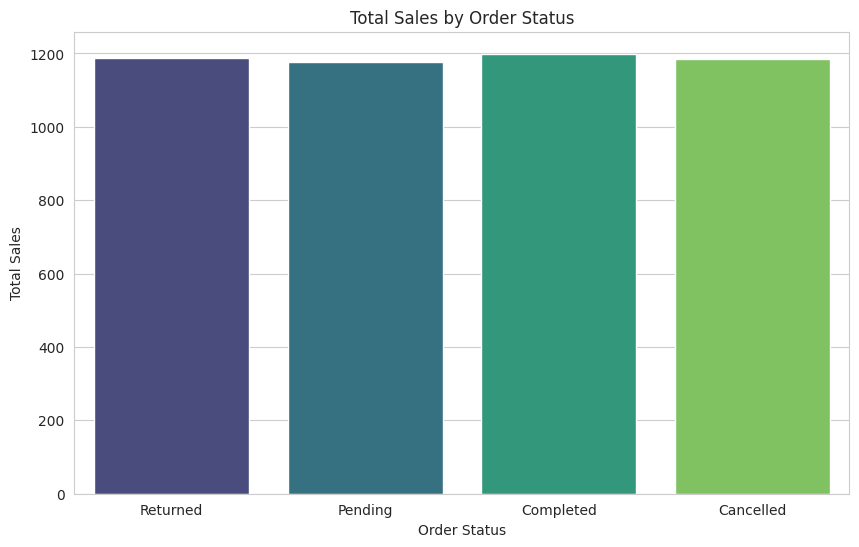

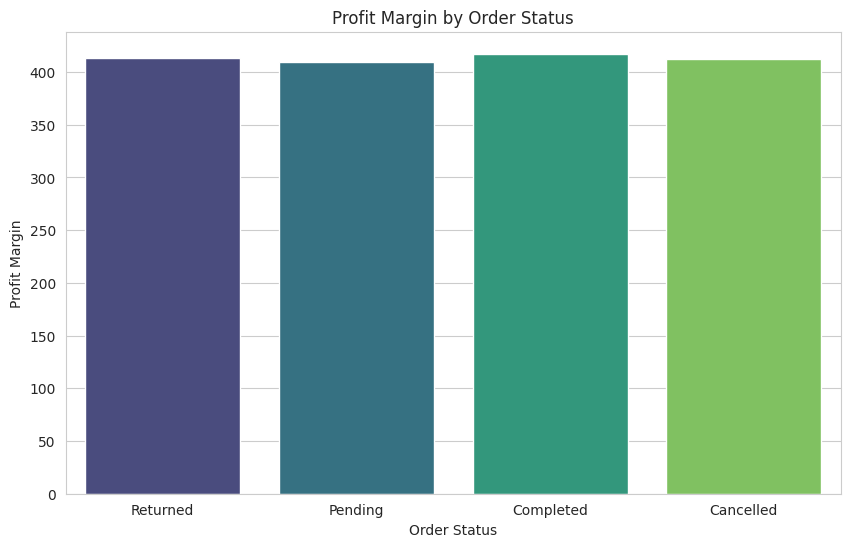

In [12]:
# Total Sales by Order Status
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Order Status', y='Total Sales', errorbar=None, palette='viridis', hue='Order Status', legend=False)
plt.title('Total Sales by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Sales')
plt.show()

# Profit Margin by Order Status
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Order Status', y='Profit Margin', errorbar=None, palette='viridis', hue='Order Status', legend=False)
plt.title('Profit Margin by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Profit Margin')
plt.show()

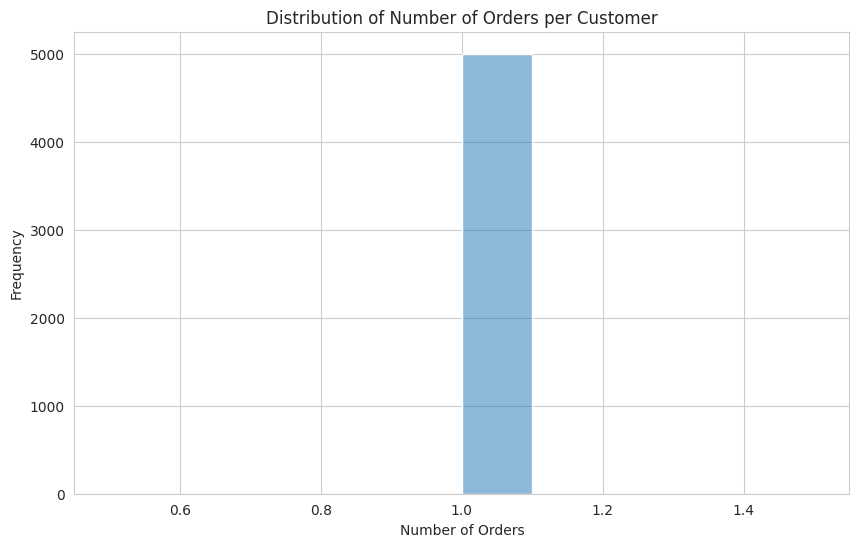

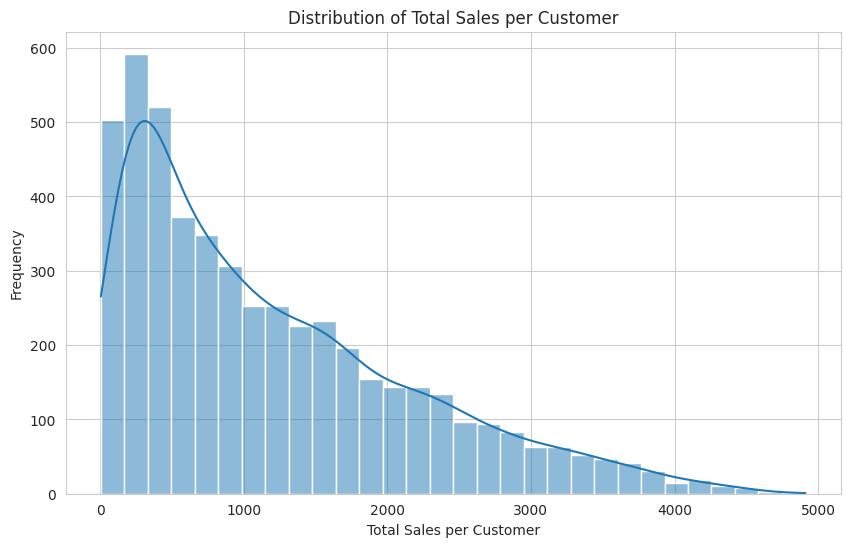

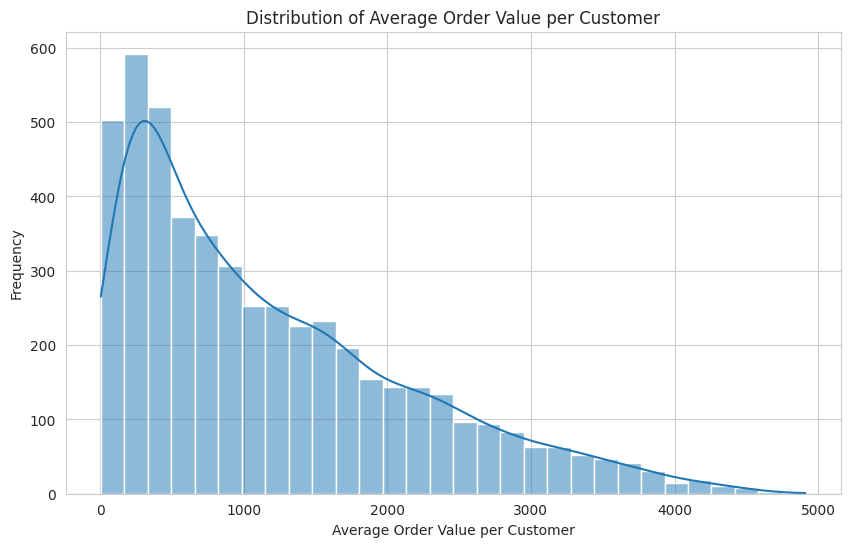

In [13]:
# Calculate customer-level metrics
customer_data = df.groupby('Customer ID').agg(
    Number_of_Orders=('Order ID', 'count'),
    Total_Sales=('Total Sales', 'sum'),
    Average_Order_Value=('Total Sales', 'mean')
).reset_index()

# Distribution of Number of Orders per Customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Number_of_Orders'], kde=True, bins=10)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

# Distribution of Total Sales per Customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Total_Sales'], kde=True, bins=30)
plt.title('Distribution of Total Sales per Customer')
plt.xlabel('Total Sales per Customer')
plt.ylabel('Frequency')
plt.show()

# Distribution of Average Order Value per Customer
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Average_Order_Value'], kde=True, bins=30)
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Average Order Value per Customer')
plt.ylabel('Frequency')
plt.show()

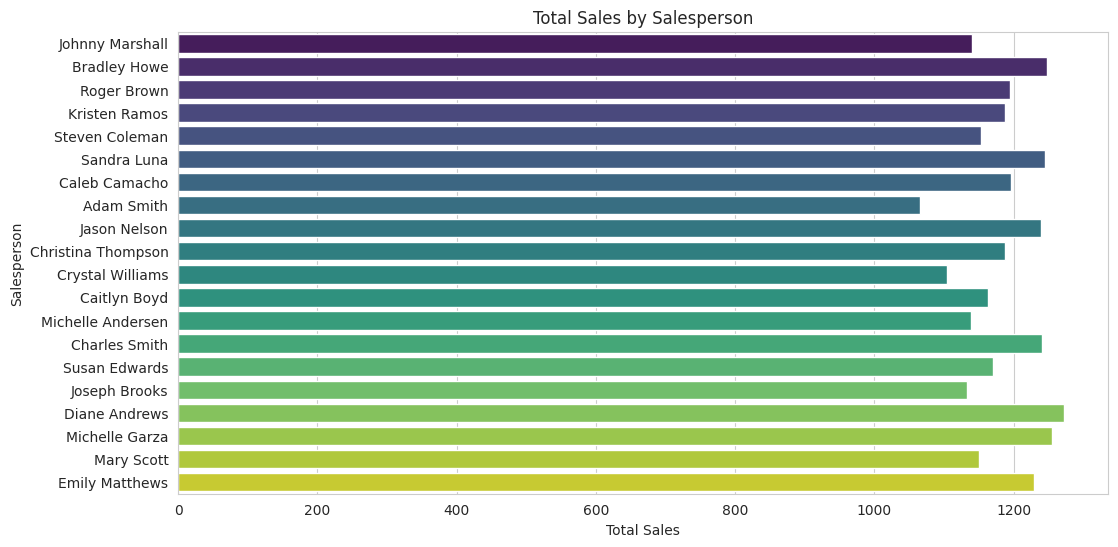

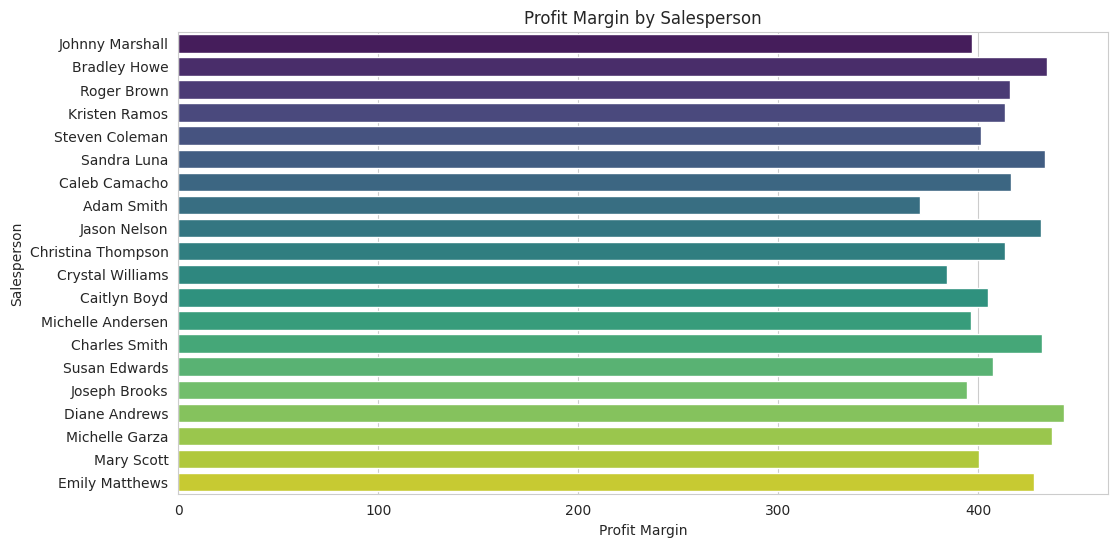

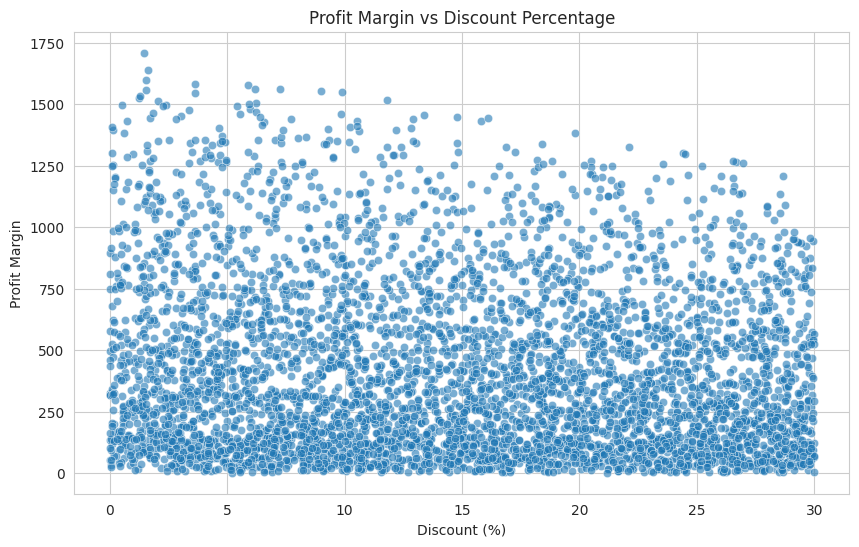

In [14]:
# Total Sales by Salesperson
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Total Sales', y='Salesperson', errorbar=None, palette='viridis', hue='Salesperson', legend=False)
plt.title('Total Sales by Salesperson')
plt.xlabel('Total Sales')
plt.ylabel('Salesperson')
plt.show()

# Profit Margin by Salesperson
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Profit Margin', y='Salesperson', errorbar=None, palette='viridis', hue='Salesperson', legend=False)
plt.title('Profit Margin by Salesperson')
plt.xlabel('Profit Margin')
plt.ylabel('Salesperson')
plt.show()

# Relationship between Discount and Profit Margin
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount (%)', y='Profit Margin', alpha=0.6)
plt.title('Profit Margin vs Discount Percentage')
plt.xlabel('Discount (%)')
plt.ylabel('Profit Margin')
plt.show()

In [15]:
import datetime as dt

# Calculate Recency, Frequency, and Monetary Value

# Define a snapshot date (a day after the last transaction date in the dataset)
snapshot_date = df['Order Date'].max() + dt.timedelta(days=1)

# Calculate RFM metrics
rfm_df = df.groupby('Customer ID').agg(
    Recency=('Order Date', lambda date: (snapshot_date - date.max()).days),
    Frequency=('Order ID', 'count'),
    Monetary=('Total Sales', 'sum')
).reset_index()

display(rfm_df.head())
display(rfm_df.info())

,Customer ID,Recency,Frequency,Monetary
0,00199efa-f77b-439f-b061-9132e01d8a11,2005,1,1597.28
1,002353f2-a753-407c-bfbc-01e741ebfd13,1138,1,2343.07
2,00412af2-4904-4a21-b72d-7e82f94df7ba,543,1,2030.75
3,0046530b-cdfa-4eef-868c-0ab173b72c39,1843,1,1258.02
4,004d41f0-66f9-4fab-8159-a02199ecda80,990,1,1478.54


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5000 non-null   object 
 1   Recency      5000 non-null   int64  
 2   Frequency    5000 non-null   int64  
 3   Monetary     5000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 156.4+ KB


None

In [16]:
# Add Average Order Value to rfm_df (already calculated in customer_data during EDA)
rfm_df = rfm_df.merge(customer_data[['Customer ID', 'Average_Order_Value']], on='Customer ID', how='left')

# Calculate Number of unique product categories purchased per customer
product_category_count = df.groupby('Customer ID')['Product Category'].nunique().reset_index(name='Number_of_Product_Categories')
rfm_df = rfm_df.merge(product_category_count, on='Customer ID', how='left')

# Calculate Average discount received per customer
df['Discount Amount'] = df['Unit Price'] * df['Quantity Sold'] * (df['Discount (%)'] / 100)
average_discount = df.groupby('Customer ID')['Discount Amount'].mean().reset_index(name='Average_Discount_Amount')
rfm_df = rfm_df.merge(average_discount, on='Customer ID', how='left')

# Calculate Most frequent payment method used by each customer
most_frequent_payment = df.groupby('Customer ID')['Payment Method'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').reset_index(name='Most_Frequent_Payment_Method')
rfm_df = rfm_df.merge(most_frequent_payment, on='Customer ID', how='left')


display(rfm_df.head())
display(rfm_df.info())

,Customer ID,Recency,Frequency,Monetary,Average_Order_Value,Number_of_Product_Categories,Average_Discount_Amount,Most_Frequent_Payment_Method
0,00199efa-f77b-439f-b061-9132e01d8a11,2005,1,1597.28,1597.28,1,172.755904,Gift Card
1,002353f2-a753-407c-bfbc-01e741ebfd13,1138,1,2343.07,2343.07,1,65.513376,Amazon Pay
2,00412af2-4904-4a21-b72d-7e82f94df7ba,543,1,2030.75,2030.75,1,639.885344,Debit Card
3,0046530b-cdfa-4eef-868c-0ab173b72c39,1843,1,1258.02,1258.02,1,23.059440,Credit Card
4,004d41f0-66f9-4fab-8159-a02199ecda80,990,1,1478.54,1478.54,1,211.412745,PayPal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   5000 non-null   object 
 1   Recency                       5000 non-null   int64  
 2   Frequency                     5000 non-null   int64  
 3   Monetary                      5000 non-null   float64
 4   Average_Order_Value           5000 non-null   float64
 5   Number_of_Product_Categories  5000 non-null   int64  
 6   Average_Discount_Amount       5000 non-null   float64
 7   Most_Frequent_Payment_Method  5000 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 312.6+ KB


None

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features (X) and target (y)
# We are predicting Customer Lifetime Value, which can be represented by 'Monetary' or 'Total_Sales' in rfm_df
# Let's use 'Monetary' as our target variable for CLV
features = ['Recency', 'Frequency', 'Average_Order_Value', 'Number_of_Product_Categories', 'Average_Discount_Amount', 'Most_Frequent_Payment_Method']
target = 'Monetary'

X = rfm_df[features]
y = rfm_df[target]

# Identify categorical and numerical features
categorical_features = ['Most_Frequent_Payment_Method']
numerical_features = ['Recency', 'Frequency', 'Average_Order_Value', 'Number_of_Product_Categories', 'Average_Discount_Amount']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (like Customer ID) if any, though not in this case
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting and preprocessing setup complete.")

Data splitting and preprocessing setup complete.


In [18]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'LightGBM Regressor': lgb.LGBMRegressor(random_state=42)
}

# Create pipelines with preprocessing and model
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', model)])
             for name, model in models.items()}

# Train the models
trained_models = {}
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f"Finished training {name}.")

print("\nAll models trained successfully.")

Training Linear Regression...
Finished training Linear Regression.
Training Ridge Regression...
Finished training Ridge Regression.
Training Lasso Regression...
Finished training Lasso Regression.
Training Random Forest Regressor...
Finished training Random Forest Regressor.
Training LightGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 8
[LightGBM] [Info] Start training from score 1186.205935
Finished training LightGBM Regressor.

All models trained successfully.


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np # Import numpy to use sqrt

# Evaluate the models
evaluation_results = {}
for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2
    }
    print(f"Finished evaluating {name}.")

# Display evaluation results
print("\nModel Evaluation Results:")
evaluation_df = pd.DataFrame(evaluation_results).T
display(evaluation_df)

Evaluating Linear Regression...
Finished evaluating Linear Regression.
Evaluating Ridge Regression...
Finished evaluating Ridge Regression.
Evaluating Lasso Regression...
Finished evaluating Lasso Regression.
Evaluating Random Forest Regressor...
Finished evaluating Random Forest Regressor.
Evaluating LightGBM Regressor...
Finished evaluating LightGBM Regressor.

Model Evaluation Results:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,MSE,RMSE,MAE,R-squared
Linear Regression,2.176462e-25,4.665257e-13,3.386642e-13,1.000000
Ridge Regression,9.306964e-02,3.050732e-01,2.313974e-01,1.000000
Lasso Regression,1.021579e+00,1.010732e+00,8.249322e-01,0.999999
Random Forest Regressor,3.549018e+00,1.883884e+00,7.402066e-01,0.999996
LightGBM Regressor,1.850540e+02,1.360345e+01,5.186860e+00,0.999814


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest Regressor
# This is an example grid, you might want to adjust the values based on your needs and computational resources
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Get the Random Forest pipeline
rf_pipeline = pipelines['Random Forest Regressor']

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

print("Starting hyperparameter tuning for Random Forest Regressor...")

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print("\nHyperparameter tuning for Random Forest Regressor complete.")

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Evaluate the best model on the test data
best_rf_model = grid_search.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)

mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mse_tuned_rf)
mae_tuned_rf = mean_absolute_error(y_test, y_pred_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

print("\nEvaluation results for Tuned Random Forest Regressor:")
print(f"MSE: {mse_tuned_rf}")
print(f"RMSE: {rmse_tuned_rf}")
print(f"MAE: {mae_tuned_rf}")
print(f"R-squared: {r2_tuned_rf}")

Starting hyperparameter tuning for Random Forest Regressor...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Hyperparameter tuning for Random Forest Regressor complete.
Best parameters found:  {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best cross-validation score (negative MSE):  -37.921513316266434

Evaluation results for Tuned Random Forest Regressor:
MSE: 3.549018257480865
RMSE: 1.883883822713297
MAE: 0.7402066000000632
R-squared: 0.9999964282552963
